In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## SPURIOUS CORRELATION

In [60]:
dji_df = pd.read_csv('~/data/DJI.csv', index_col = 'Date')

In [61]:
dji_df.head()

,Value
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [62]:
dji_df.tail()

,Value
Date,
2009,10428.05
2010,11577.51
2011,12217.56
2012,13104.14
2013,16576.66


In [63]:
dji_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1941 to 2013
Data columns (total 1 columns):
Value    73 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [64]:
dji_df.index = pd.to_datetime(dji_df.index, format = '%Y')

In [65]:
dji_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 1941-01-01 to 2013-01-01
Data columns (total 1 columns):
Value    73 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [66]:
dji_df.head()

,Value
Date,
1941-01-01,110.96
1942-01-01,119.40
1943-01-01,135.89
1944-01-01,152.32
1945-01-01,192.91


In [67]:
ufo_df = pd.read_csv('UFO.csv', index_col = 'Date')

In [68]:
ufo_df.head()

,Value
Date,
1941,1
1942,2
1943,9
1944,9
1945,9


In [69]:
ufo_df.index = pd.to_datetime(ufo_df.index, format = '%Y')

In [70]:
ufo_df.head()

,Value
Date,
1941-01-01,1
1942-01-01,2
1943-01-01,9
1944-01-01,9
1945-01-01,9


In [71]:
ufo_df.tail()

,Value
Date,
2009-01-01,4541
2010-01-01,4283
2011-01-01,5107
2012-01-01,7357
2013-01-01,7037


In [72]:
ufo_dji_df = ufo_df.join(dji_df, how='inner', lsuffix='_ufo', rsuffix='_dji')

In [73]:
ufo_dji_df.head()

,Value_ufo,Value_dji
Date,,
1941-01-01,1,110.96
1942-01-01,2,119.40
1943-01-01,9,135.89
1944-01-01,9,152.32
1945-01-01,9,192.91


In [74]:
# Compute correlation of LEVELS
correlation1 = ufo_dji_df['Value_ufo'].corr(ufo_dji_df['Value_dji'])
print("Correlation of levels: ", correlation1)

# Compute correlation of PERCENT CHANGES
changes = ufo_dji_df.pct_change()
correlation2 = changes['Value_ufo'].corr(changes['Value_dji'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.939976221073
Correlation of changes:  0.0602693546241


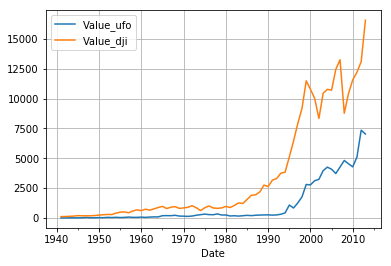

In [75]:
ufo_dji_df.plot(grid = True)
plt.show()

## (LAG ONE) AUTOCORRELATION FOR MSFT *RETURNS*

In [76]:
msft_df = pd.read_csv('~/data/MSFT.csv', index_col = 'Date')

In [77]:
msft_df.head()

,Adj Close
Date,
8/6/2012,26.107651
8/7/2012,26.377876
8/8/2012,26.438896
8/9/2012,26.587088
8/10/2012,26.517351


In [78]:
msft_df.index = pd.to_datetime(msft_df.index)

In [79]:
msft_df.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [80]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


**WEEKLY MEAN REVERSION**

In [81]:
# Convert the daily data to weekly data
msft_df = msft_df.resample(rule = 'W').last()

# Compute the percentage change in prices
returns = msft_df.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


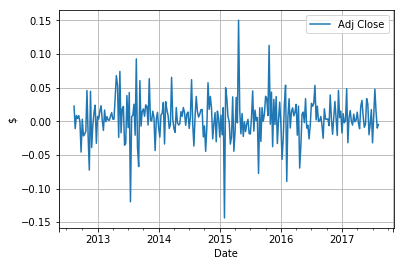

In [82]:
returns.plot(grid = True)
plt.ylabel('$')
plt.show()

## AUTOCORRELATION FUNCTION FOR HRB EARNINGS

In [55]:
hrb_df = pd.read_csv('~/data/HRB.csv', index_col = 'Quarter')

In [56]:
hrb_df.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


In [57]:
hrb_df.index = pd.to_datetime(hrb_df.index)

In [58]:
hrb_df.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In [59]:
hrb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2007-01-01 to 2017-10-01
Data columns (total 1 columns):
Earnings    44 non-null float64
dtypes: float64(1)
memory usage: 704.0 bytes


In [60]:
from statsmodels.graphics.tsaplots import plot_acf

**HRB EARNINGS ARE NONSTATIONARY / CYCLIC**

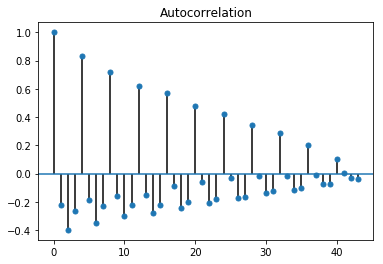

In [89]:
plot_acf(hrb_df, alpha = 1)
plt.show()

## ACF FOR MSFT WEEKLY RETURNS

The autocorrelation of weekly MSFT returns is -0.16


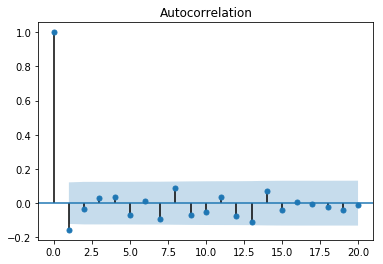

In [94]:
# Compute and print the autocorrelation of MSFT weekly returns, as before
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

returns = returns.dropna()

# Confidence interval is centered at zero!
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, lags = 20, alpha=0.05)
plt.show()

## WHITE NOISE & RANDOM WALKS

**PRICES ARE A RANDOM WALK (WITH DRIFT?), RETURNS (PCT_CHANGE or DIFF?) ARE WHITE NOISE**

The mean is 0.019 and the standard deviation is 0.049


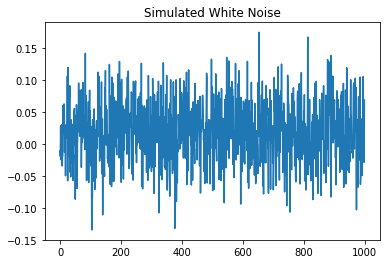

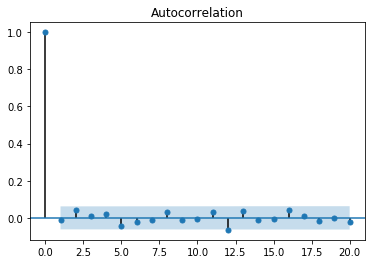

In [99]:
# Simulate (Gaussian) white noise returns
# The argument for the mean is 'loc' and the argument for the standard deviation is 'scale'
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series as line plot
plt.plot(returns)
plt.title('Simulated White Noise')
plt.show()

# Plot autocorrelation function of white noise returns, with 95% confidence interval centered at zero
plot_acf(returns, lags=20, alpha=0.05)
plt.show()

[ 0.         -1.14105868 -0.84259046 -1.49144947 -1.61404818]
[ 100.           98.85894132   98.01635087   96.52490139   94.91085322]


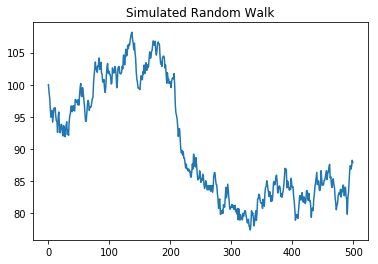

In [110]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0
print(steps[:5])

# Simulate stock prices P with a starting price of 100
P = 100 + np.cumsum(steps)
print(P[:5])

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

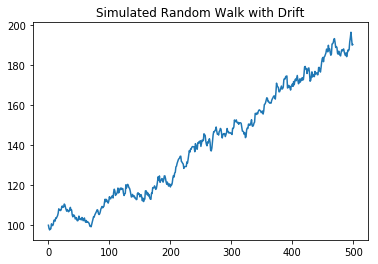

In [111]:
# Generate 500 random steps
steps = np.random.normal(loc=1.001, scale=0.01, size=500)

# Set first element to 1
steps[0] = 1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

**THERE IS DRIFT, SINCE MEAN ('LOC') IS NOT EQUAL TO ONE**

**NOW TO WORK WITH ACTUAL DATA**

In [114]:
amzn_df = pd.read_csv('~/data/AMZN.csv', index_col = 'Date')

In [115]:
amzn_df.head()

,Adj Close
Date,
5/15/1997,1.958333
5/16/1997,1.729167
5/19/1997,1.708333
5/20/1997,1.635417
5/21/1997,1.427083


In [118]:
amzn_df.index = pd.to_datetime(amzn_df.index)

### Dickey-Fuller test

**The Dickey-Fuller test is a one-sided test to check whether a time series is a random walk.  It doesn't tell us about drift.**

In [86]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [119]:
# Run the ADF test on the price series and print out the results
results = adfuller(amzn_df['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.0251685257707441, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.8621120497269161, '10%': -2.5670745025321304}, 30308.642164269811)
The p-value of the test on prices is: 1.0


In [120]:
# Create a DataFrame of AMZN returns
AMZN_ret = amzn_df.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.56558980834e-22


**Interpretation:**
- Fail to reject the null hypothesis that AMZN prices are a random walk.
- Reject the null hypothesis that AMZN *returns* are a random walk.

## CONVERTING HRB EARNINGS TO A STATIONARY SERIES

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


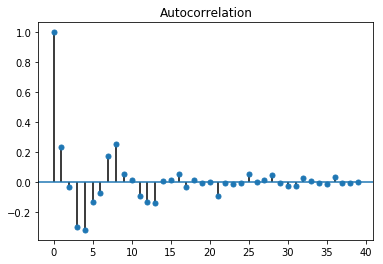

In [61]:
# Seasonally adjust quarterly earnings
HRBsa = hrb_df.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa, alpha = 1)
plt.show()

## AUTOREGRESSIVE MODELS

In [4]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

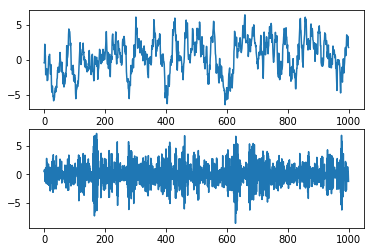

In [7]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
# line plot of simulated time series

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, +0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

**Autocorrelation exhibits exponential decay**

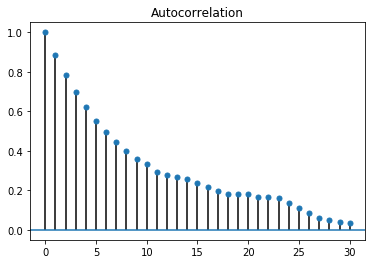

In [124]:
plot_acf(simulated_data_1, lags = 30, alpha = 1)
plt.show()

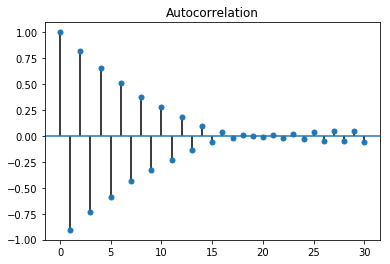

In [125]:
plot_acf(simulated_data_2, lags = 30, alpha = 1)
plt.show()

In [2]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

In [126]:
# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)
# Is the drift equal to zero for all of this?
# What is the difference between drift and trend?

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1454.896
Method:                       css-mle   S.D. of innovations              1.036
Date:                Fri, 07 Sep 2018   AIC                           2915.792
Time:                        16:58:36   BIC                           2930.515
Sample:                             0   HQIC                          2921.388
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1837      0.283     -0.649      0.516      -0.738       0.371
ar.L1.y        0.8851      0.015     60.146      0.000       0.856       0.914
                                    Roots           

### Forecasting with an AR Model

simulated_data_1 generated by AR(1) process with $\phi = 0.9$

$R_t = \phi * R_{t-1} + \epsilon_t + \mu$

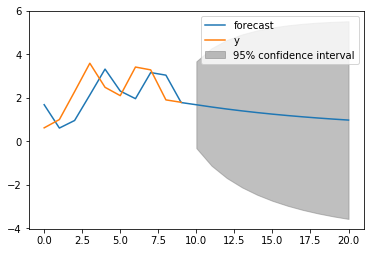

[ 0.50636864  0.91267944]


In [8]:
# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010) # res.predict()
plt.show()

print(res.params)
# Notice the widening confidence interval in the plot below.

### Partial Autocorrelation Function

**Choosing the order of the AR model by plotting the partial autocorrelation function (PACF).**

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

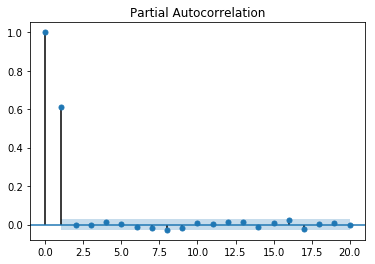

In [10]:
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

**Above, we see just one statistically significant autocorrelation (apart from the lag zero autocorr, which is always equal to one).**

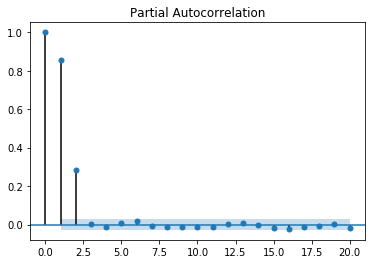

In [11]:
# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

**Above, we see two statistically significant autocorrelations (apart from the lag zero autocorr, which is always equal to one).**

### Information Criteria

**Another option is to choose the order of the model which minimizes an information criterion.**  (Bayesian, Hannan-Quinn, Akaike)

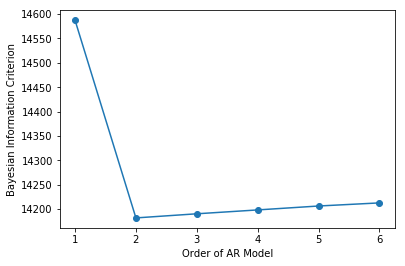

In [12]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    # Recall that these data were generated through an AR(2) process
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

## MOVING AVERAGE MODELS

**Now switching focus to moving average (MA) models**

**Formula for MA(1) model**
$R_t = R_{t-1} + \mu + \epsilon_t + \theta * \epsilon_{t-1}$

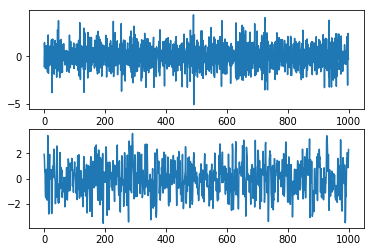

In [13]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, +0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

**Above are line plots for data generated through MA(1) processes**

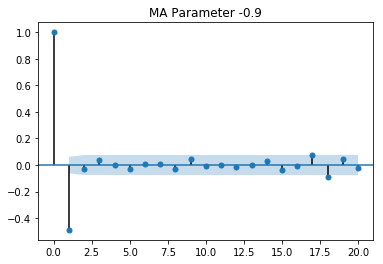

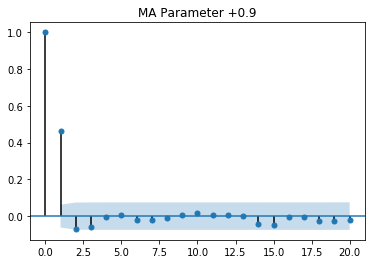

In [20]:
# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.title("MA Parameter -0.9")
plt.show()

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20)
plt.title("MA Parameter +0.9")
plt.show()

**These are NOT PARTIAL autocorrelation plots!  For an MA(1) model, lag one autocorrelation is given by**

$$\frac{\theta}{1 + \theta^2}$$

**For an MA(p) model, more generally, autocorrelation beyond lag p should be statistically insignificant.**

In [22]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1400.266
Method:                       css-mle   S.D. of innovations              0.981
Date:                Sat, 08 Sep 2018   AIC                           2806.532
Time:                        16:22:00   BIC                           2821.255
Sample:                             0   HQIC                          2812.128
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.003      0.959      0.338      -0.003       0.008
ma.L1.y       -0.9119      0.013    -71.426      0.000      -0.937      -0.887
                                    Roots           

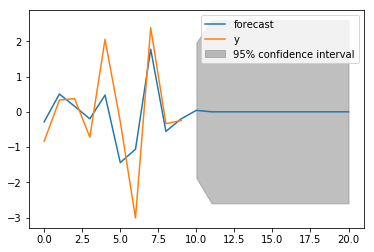

In [23]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

**One big difference between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.**

### Example - Sprint stock

**INTRADAY ANALYSIS for price of Sprint stock, sampled at a frequency of one minute**

In [41]:
sprint_df = pd.read_csv('/Users/kadakia/data/Sprint_Intraday.txt', header = None, usecols = [0,1])

In [42]:
sprint_df.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


**First, some data cleaning:**

In [43]:
# Change the first date to the integer zero
sprint_df.iloc[0,0] = 0

In [44]:
# Change the column headers to 'DATE' and 'CLOSE'
sprint_df.columns = ['DATE','CLOSE']

In [45]:
sprint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
DATE     389 non-null object
CLOSE    389 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [46]:
# Convert DATE column to integer
sprint_df['DATE'] = pd.to_numeric(sprint_df['DATE'])

In [47]:
# Make the 'DATE' column the new index
sprint_df = sprint_df.set_index('DATE')

In [48]:
sprint_df.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


In [49]:
sprint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 390
Data columns (total 1 columns):
CLOSE    389 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [50]:
sprint_df.tail()

,CLOSE
DATE,
386,8.275
387,8.280
388,8.275
389,8.275
390,8.280


**Notice that two rows are missing!**

(Most) stocks trade at discrete one-cent increments rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range.  This is sometimes referred to as "bid/ask bounce".

In [ ]:
# Find the missing rows
print("Missing rows: ", set(range(391)) - set(sprint_df.index))

# Fill in the missing rows
sprint_df = sprint_df.reindex(range(391), method='ffill')

Missing rows:  {182, 14}


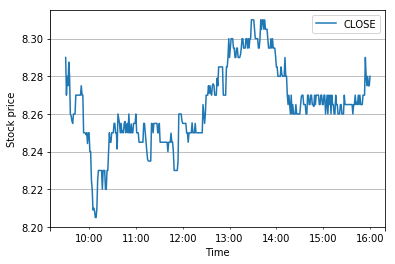

In [51]:
# Change the index to the intraday times
sprint_df.index = pd.date_range(start='2017-08-28 09:30', end='2017-08-28 16:00', freq='1min')
# pd.to_datetime won't work here

# Plot the intraday time series
# Use .plot() method of dataframes
sprint_df.plot(grid=True)
plt.ylabel('Stock price')
plt.xlabel('Time')
plt.show()

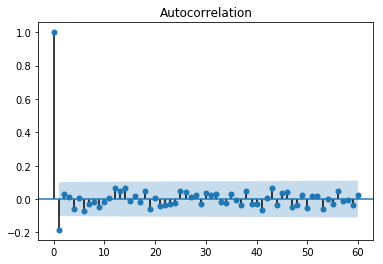

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [52]:
# Compute returns from prices and drop the NaN
returns = sprint_df.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)
# DON'T KNOW TRUE \theta VALUE!

**Shouldn't stock returns be white noise?**

## CO-INTEGRATION OF TWO TIME SERIES

**Two time series are random walks, yet a linear combination of them isn't a random walk**

Procedure for diagnosing co-integration:
1. Regression
2. Dickey-Fuller

In [64]:
ng_df = pd.read_csv('/Users/kadakia/data/CME_NG1.csv', index_col = 'Date')

In [65]:
ng_df.head() # index appears to be in reverse chronological order

,Close
Date,
12/30/2005,11.225
12/29/2005,11.223
12/28/2005,11.431
12/27/2005,11.022
12/23/2005,12.283


In [66]:
ng_df.index = pd.to_datetime(ng_df.index)

In [70]:
ng_df = ng_df.sort_index()

In [71]:
ng_df.head()

,Close
Date,
1991-01-02,1.832
1991-01-03,1.782
1991-01-04,1.743
1991-01-07,1.785
1991-01-08,1.786


In [79]:
ho_df = pd.read_csv('/Users/kadakia/data/CME_HO1.csv', index_col = 'Date')

In [80]:
ho_df.head()

,Close
Date,
12/30/2005,1.7280
12/29/2005,1.7030
12/28/2005,1.6825
12/27/2005,1.6370
12/23/2005,1.7053


In [81]:
ho_df.index = pd.to_datetime(ho_df.index)

In [82]:
ho_df = ho_df.sort_index()

In [83]:
ho_df.head()

,Close
Date,
1991-01-02,0.7330
1991-01-03,0.7024
1991-01-04,0.6830
1991-01-07,0.7617
1991-01-08,0.7430


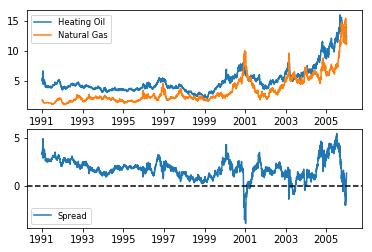

In [84]:
# Line plots of the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*ho_df, label='Heating Oil')
plt.plot(ng_df, label='Natural Gas')
plt.legend(loc='best', fontsize='small')
# Didn't know about loc = 'best'

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*ho_df-ng_df, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')

plt.show()

In [87]:
# Compute the ADF for HO and NG
result_HO = adfuller(ho_df['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(ng_df['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * ho_df['Close'] - ng_df['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.956710878502
The p-value for the ADF test on NG is  0.900874744468
The p-value for the ADF test on the spread is  7.01943930214e-05


**Indeed, we can't reject the hypothesis that the prices of natural gas and heating oil are random walks.  However, we reject the hypothesis that the spread between the two prices is a random walk.**

The cointegration vector is (1,−1).

## ARIMA MODEL FOR CLIMATE

**Average annual temperature in NY from 1870 to 2016**

In [95]:
ny_df = pd.read_csv('NOAA_TAVG.csv', index_col = 'DATE')

In [96]:
ny_df.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


In [97]:
ny_df.index = pd.to_datetime(ny_df.index, format = '%Y')

In [98]:
ny_df.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


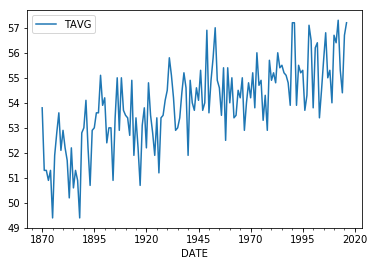

The p-value for the ADF test is  0.583293898787


In [100]:
# Plot average temperatures
# Plotting temperature values, not changes
ny_df.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(ny_df['TAVG'])
print("The p-value for the ADF test is ", result[1])

**Based on the Dickey-Fuller test and the plot, this time series is a random walk with drift.**

In [102]:
# Take first difference of the temperature series
chg_temp = ny_df.diff()
chg_temp = chg_temp.dropna()

# So chg_temp is de-trended / stationary / white noise?

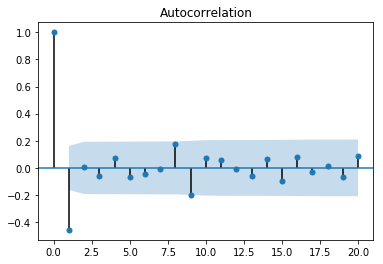

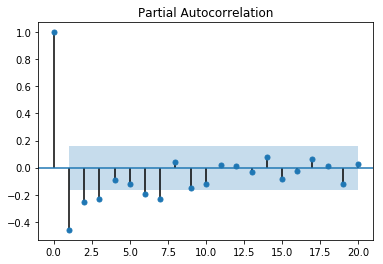

In [104]:
# Plot the ACF
plot_acf(chg_temp, lags=20)
plt.show()

# Plot the PACF
plot_pacf(chg_temp, lags=20)
plt.show()

In [105]:
# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

/Users/kadakia/miniconda3/envs/dspy3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/kadakia/miniconda3/envs/dspy3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/kadakia/miniconda3/envs/dspy3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/kadakia/miniconda3/envs/dspy3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.5346898313911
The AIC for an AR(2) is:  501.9274123160228
The AIC for an MA(1) is:  469.3909693438297
The AIC for an ARMA(1,1) is:  469.07291101738303


**This is surprising to me.  From the PACF, I might have chosen an AR(1) model.**

In [106]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

/Users/kadakia/miniconda3/envs/dspy3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/kadakia/miniconda3/envs/dspy3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


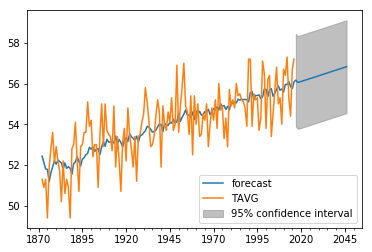

                             ARIMA Model Results                              
Dep. Variable:                 D.TAVG   No. Observations:                  146
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -230.536
Method:                       css-mle   S.D. of innovations              1.155
Date:                Sat, 08 Sep 2018   AIC                            469.073
Time:                        17:53:43   BIC                            481.007
Sample:                    01-01-1871   HQIC                           473.922
                         - 01-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.003     10.918      0.000       0.023       0.033
ar.L1.D.TAVG     0.1272      0.083      1.527      0.129      -0.036       0.291
ma.L1.D.TAVG    -1.0000      0.023    -43.96

In [112]:
# Forecast temperature using an ARIMA(1,1,1) model
# The middle index of 1 indicates first difference
mod = ARIMA(ny_df, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

print(res.summary())

In [113]:
import warnings

In [114]:
warnings.filterwarnings('ignore')